In [59]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (20, 15)

### Problem 1

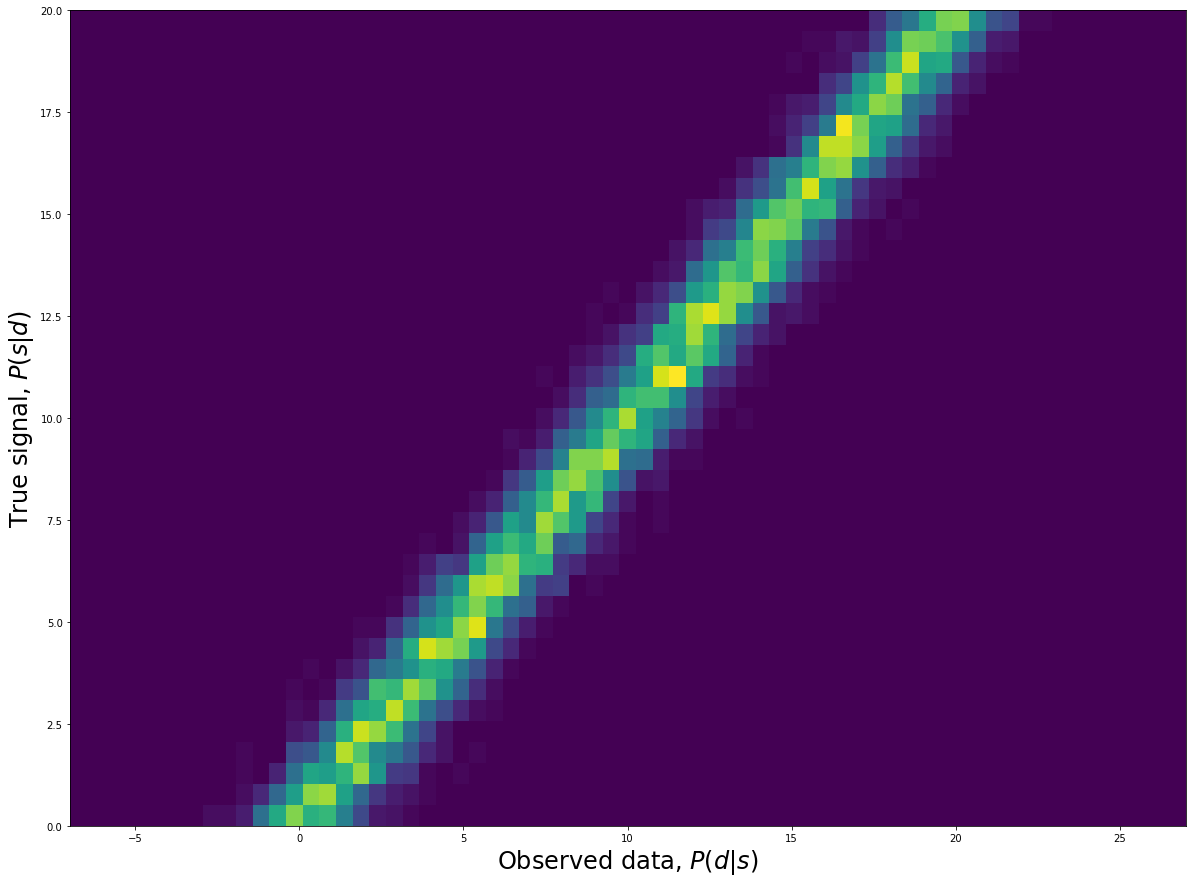

In [92]:
bkgd = stats.norm.rvs(0, size=10000)
signal = np.random.uniform(low=0.0, high=20, size=(10000))
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

#### Problem 1b

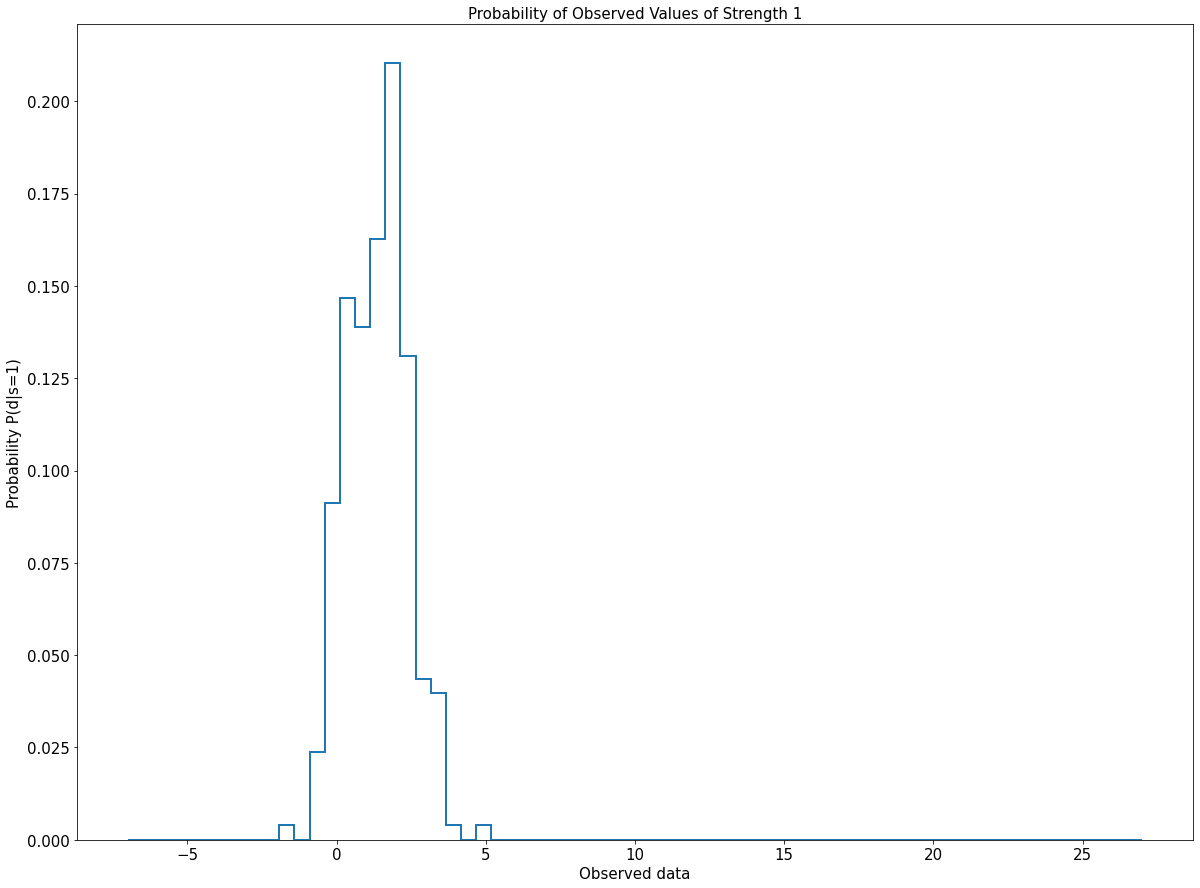

In [93]:
bin_signal = np.digitize(1, signaledges) 
    
prob_data = Psd[:, bin_signal]

prob_data = prob_data*(1/np.sum(prob_data))

plt.stairs(prob_data, edges = dataedges, linewidth = 2)
plt.title(f'Probability of Observed Values of Strength 1', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(d|s=1)', fontsize = 15)
plt.xlabel('Observed data', fontsize = 15)
plt.show()

We are simulating behavior of the data in the presence of fake signals. Here, we have observed data with an injected value of one. This is a slice of the 2d histogram, and as such is representative of where the signal would most likely be when P(d|s) = 1. This is demonstrating the likelihood of observing data with a value of 1.

#### Problem 1c

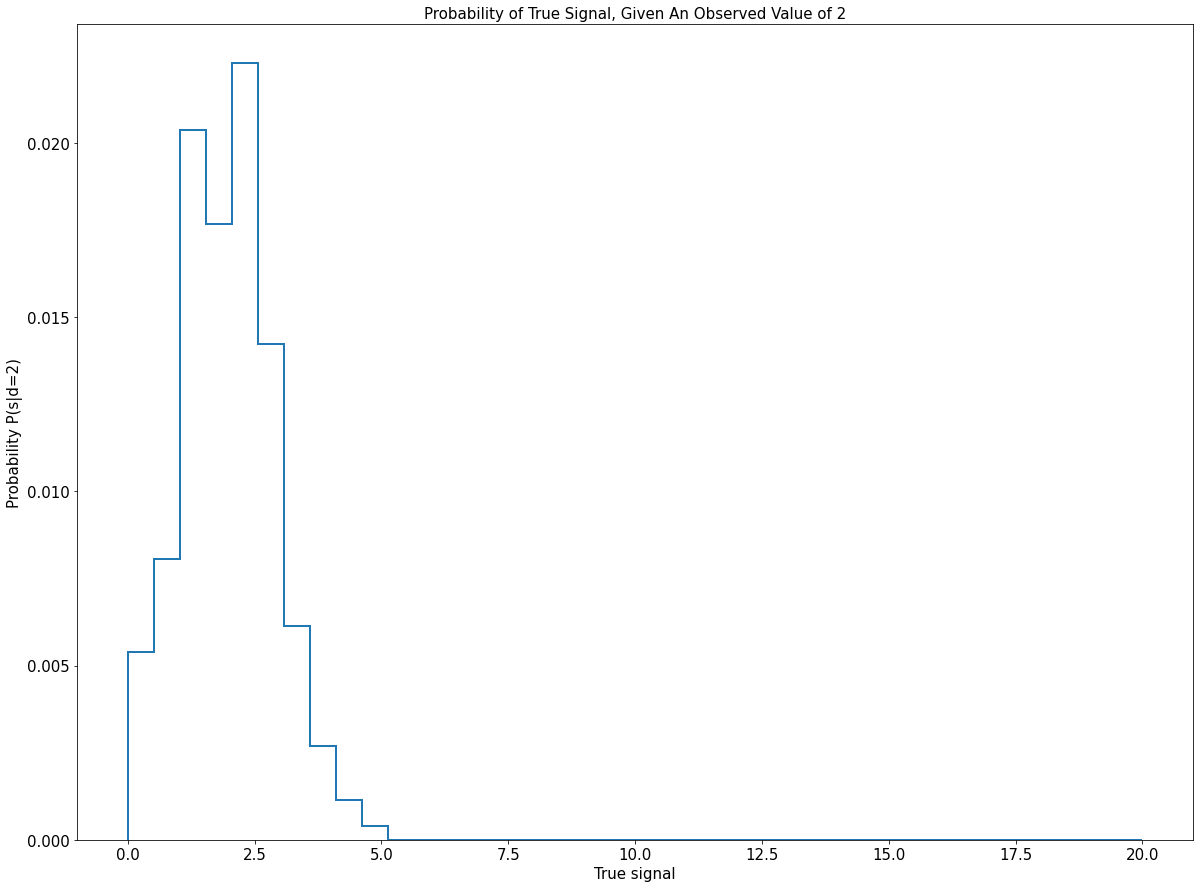

In [96]:
obs_signal = 2
bin_obs = np.digitize(obs_signal, dataedges) - 1
prob_obs = Psd[bin_obs, :]

prob_obs1 = prob_obs*(1/(np.sum(prob_obs)))

plt.stairs(prob_obs, edges = signaledges, linewidth = 2)
plt.title(f'Probability of True Signal, Given An Observed Value of 2', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(s|d=2)', fontsize = 15)
plt.xlabel('True signal', fontsize = 15)
plt.show()

This graph is demonstrating that given an observed value of two, our true signal is most likely to be at a mean of 2.4. This is a vertical slice of the 2d histogram (as opposed to the horizontal slice above). This is demonstrating the likelihood of observing a true signal with a value of 2.

### Problem 2

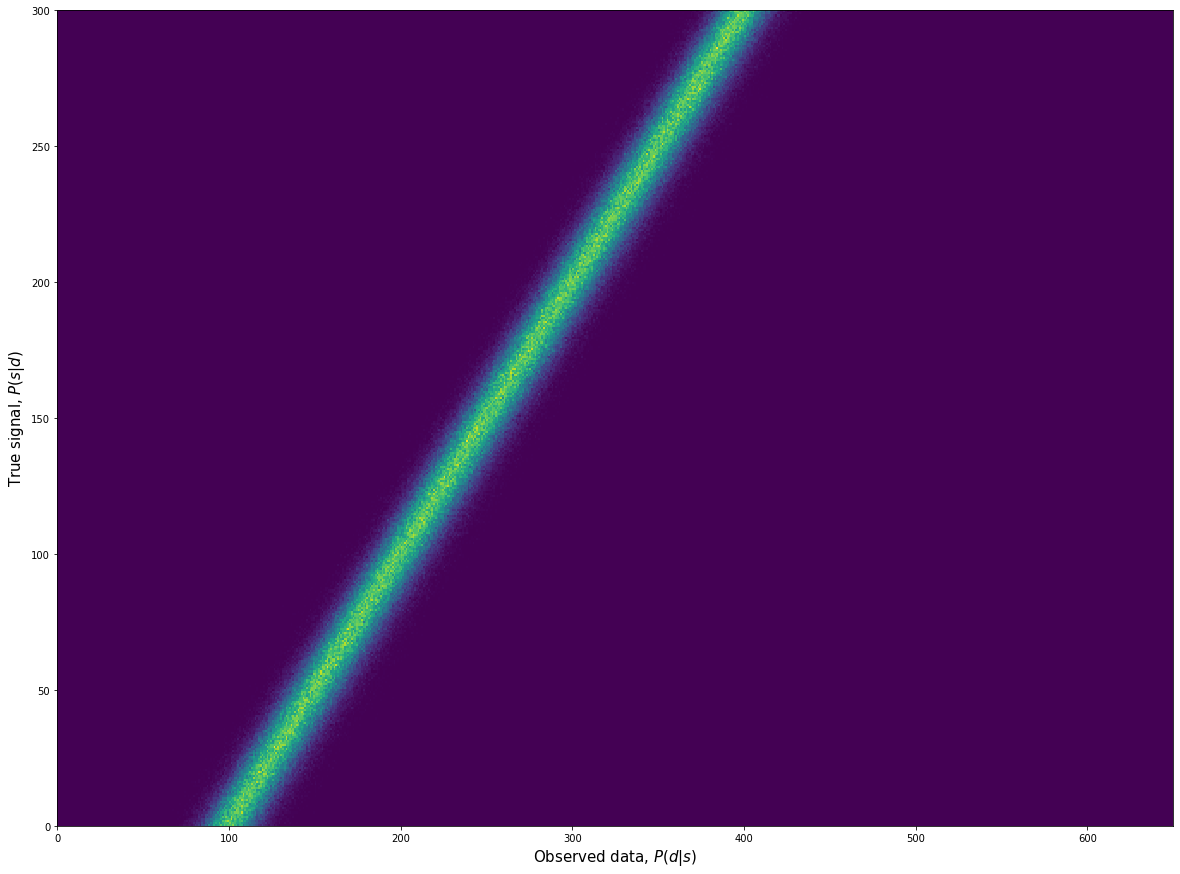

In [85]:
bkgd = scipy.stats.poisson.rvs(100, loc=0, size=1000000)
signal = np.random.uniform(low=0.0, high=300, size=(1000000))
data = bkgd + signal

signaledges = np.linspace(0,300, 400)
dataedges = np.linspace(0, 650, 651)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters, Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 15)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 15)
plt.show()

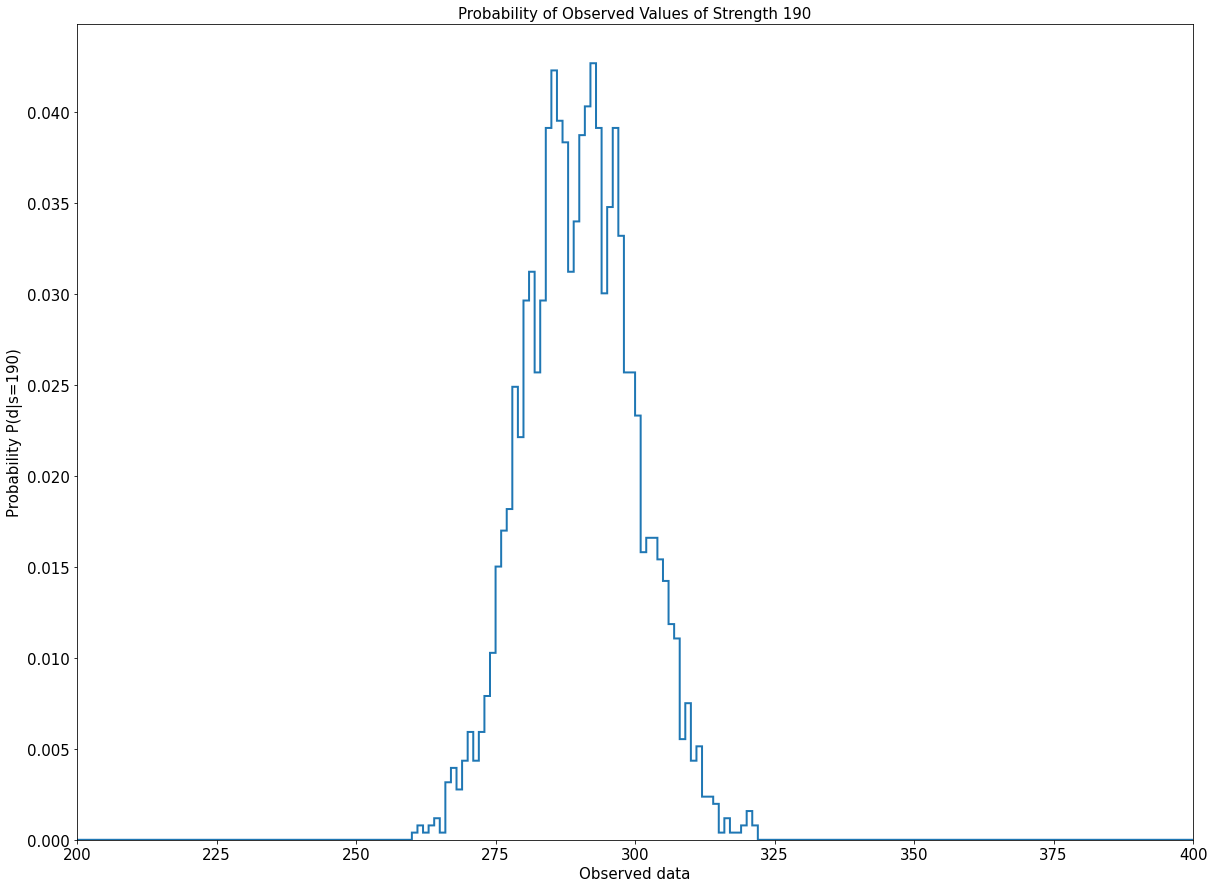

In [86]:
bin_signal = np.digitize(190, signaledges) 
    
prob_data = Psd[:, bin_signal]

prob_data = prob_data*(1/np.sum(prob_data))

plt.stairs(prob_data, edges = dataedges, linewidth = 2)
plt.title(f'Probability of Observed Values of Strength 190', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(d|s=190)', fontsize = 15)
plt.xlabel('Observed data', fontsize = 15)
plt.xlim([200,400])
plt.show()

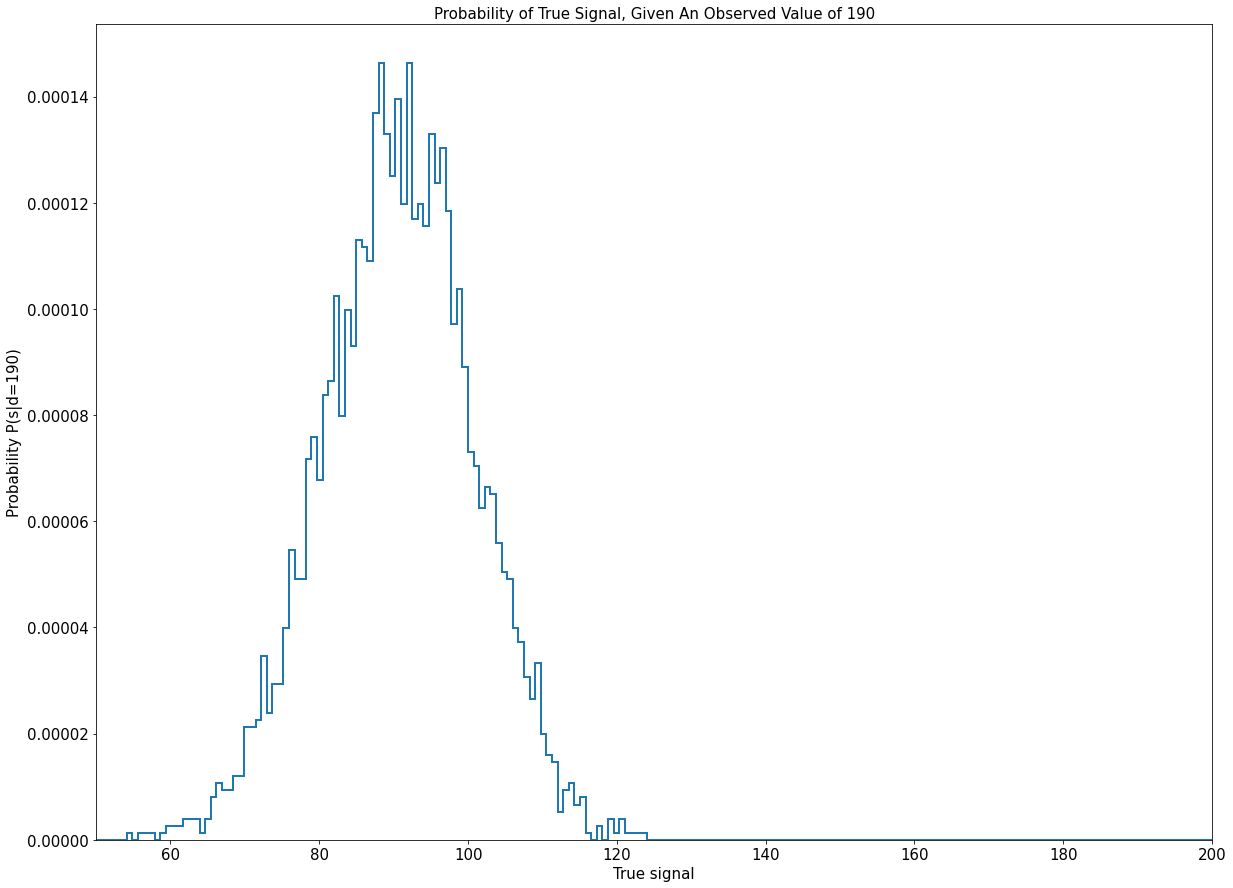

In [89]:
obs_signal = 190
bin_obs = np.digitize(obs_signal, dataedges) - 1
prob_obs = Psd[bin_obs, :]

prob_obs1 = prob_obs*(1/(np.sum(prob_obs)))

plt.stairs(prob_obs, edges = signaledges, linewidth = 2)
plt.title(f'Probability of True Signal, Given An Observed Value of 190', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(s|d=190)', fontsize = 15)
plt.xlabel('True signal', fontsize = 15)
plt.xlim(50,200)
plt.show()

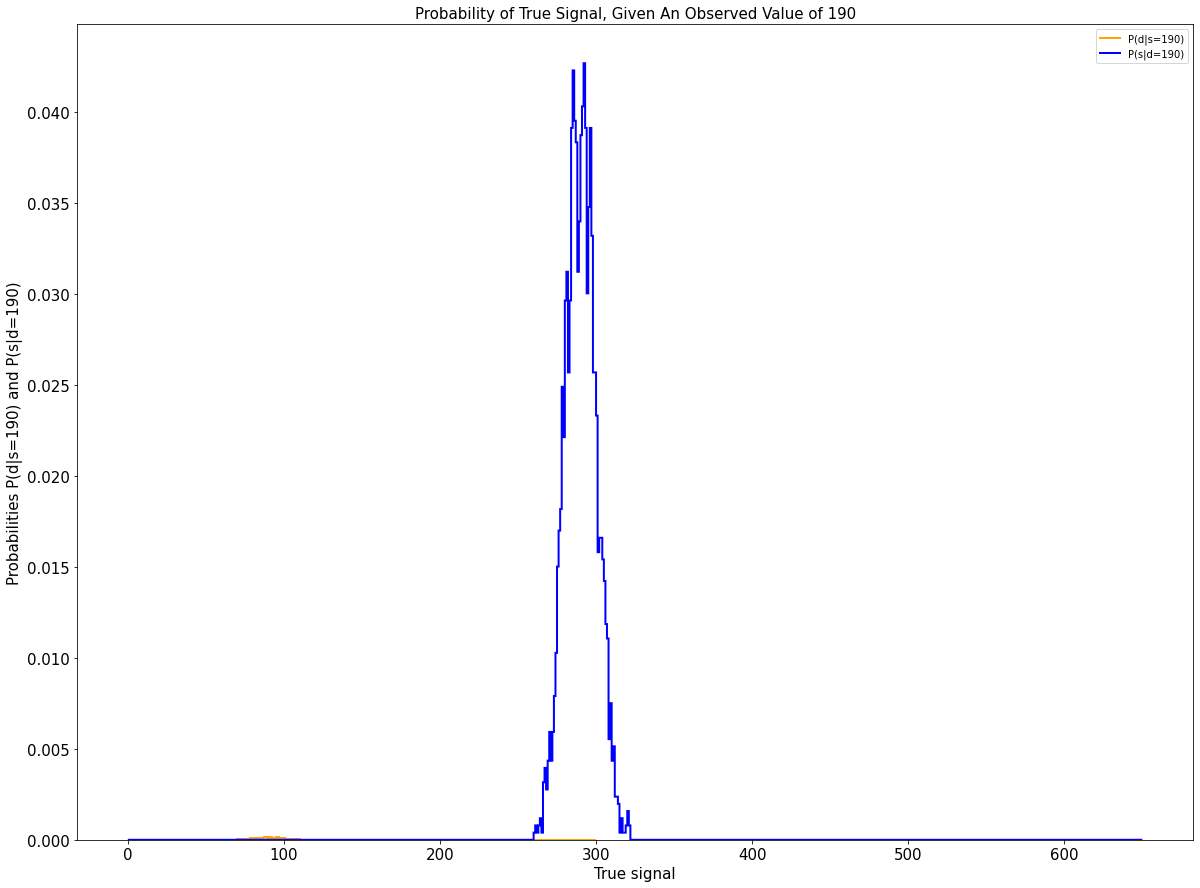

In [90]:
plt.stairs(prob_obs, edges = signaledges, linewidth = 2, color = 'orange', label = 'P(d|s=190)')
plt.stairs(prob_data, edges = dataedges, linewidth = 2, color = 'blue', label = 'P(s|d=190)')
plt.title(f'Probability of True Signal, Given An Observed Value of 190', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probabilities P(d|s=190) and P(s|d=190)', fontsize = 15)
plt.xlabel('True signal', fontsize = 15)
plt.legend()
plt.show()

These plots are not centered about the same value because they represent different probabilities. P(d|s) is the probability that a specific signal would produce the given data, while P(s|d) is the probability that given a data reading it was produced by a specific signal. The graph demonstrates that with a signal of 190, we are far more likely to view data with a mean of about 285 than observe a true signal of 90. This is because there will be far greater background noise than actual data, which is reflected in the smaller amplitudes of graphs, and the fact that the signal does not impact the larger data observation.